# **Team ID: [72317]**

# **Flare Information:**

**Flare name: c_class_1**

**Flare date and time (in UCT) of the peak of the flare: 12/25/2011 @20:30**

**Approximate peak height (in $W/m^2$): 7.7e-6**

**Flare subclass (e.g., C5): C7**

# **Determing total energy of your own flare**

Welcome to Weeks 9 and 10! During these next two labs, you will be choosing your own flare to analyze from the Space Weather Data Portal and calculating the total energy of the flare. Your lab group has been assigned a flare class--you can find this assignment on Canvas.

Remember, the [X-ray flare classification](https://spaceweather.com/glossary/flareclasses.html) represents the peak irradiance of the flare (as seen for wavelengths within the 1 to 8 $Å$ range) and   includes two parts. First, a letter (A, B, C, M, and X) representing an order of magnitude of the flare, and secondly, a number (1-9) within the specified order. For example, a X3 flare has a peak irradiance of $3 × 10^{-4}$ $W/m^2$; whereas, a M3 flare has ten times lower irradiance. If the flare is larger than an X9 ($9 \times 10^{-4} W/m^2$), then the number is extended beyond 9. For example, a X14 flare has a peak irradiance of $14 × 10^{-4} W/m^2$.

> (1) Go to the Space Weather Data Portal and choose a flare from the assigned class.

> (2) Provide a description of the flare you chose at the top of the page and give the flare a unique name--be creative!

> (3) Download the data from the flare into a CSV file.

> (4) Use a similar procedure from last weeks lab and modify the code you wrote to determine the total energy of the flare of this flare.

> (5) Document your code using markdown cells and comments to explain your procedure.

> (6) Bonus: If you finish, find more flares to analyze!

# **Task 1: Find your solar flare**

Go onto the [Space Weather Data Portal website](https://lasp.colorado.edu/space-weather-portal/) and follow the [tutorial posted on Canvas](https://canvas.colorado.edu/courses/64020/pages/week-8#Tutorial2) to find a flare of the assigned class type that occured during the **GOES-15 satellite solar maxiumum (01/01/2011 - 01/01/2015)**.

Choose the flares to help the research project (i.e, not flares that have been previously analyzed in the class such as the Sept. 10th, 2017 flare or the flares from the baseline correction examples colab notebook which occurred on May 5th, 2015, November 11th, 2013 and March 31st, 2011).



# **Task 2: Download the data**

Download the longwave data from the Space Weather Data Portal website as a .csv file.

# **Task 3: Determine total energy of flare**

Import the XRS longwave data of the solar flare you chose onto your personal computer. You can follow the same procedure that you used in the Week 6 lab.

Execute the code cell below to save the data into the variable "solar_data". Note, you may need to change the file name to match the file you imported into this session. Additionally, if you leave this session you may need to repeat the above steps to import the file again.

In [ ]:
import pandas as pd

solar_data = pd.read_csv('c_class_1.csv')     # Import data using pandas library

display(solar_data)       # Display the dataframe of the solar data

,time (milliseconds since 1970-01-01),longwave (W/m^2)
0,1.324841e+12,9.973691e-07
1,1.324841e+12,9.644669e-07
2,1.324841e+12,9.310890e-07
3,1.324841e+12,9.054680e-07
4,1.324841e+12,8.828750e-07
...,...,...
215,1.324854e+12,5.311310e-07
216,1.324854e+12,5.353400e-07
217,1.324854e+12,5.320840e-07
218,1.324854e+12,5.296410e-07


The solar flare data is in the units of solar irradiance ($\frac{W}{m^2}$). As you know by now, the next step is to use this to calculate energy per second ($ergs/s$) and convert time from ISO units to seconds.

You've done this multiple times before at this point, so we'll just re-use the kind of code you've previously written to do this:

In [ ]:
import numpy as np

# Calculate power in ergs/s
w2erg = 10**7 # Conversion factors from watts to ergs per second
int_m2 = 4*np.pi*(1.496*10**11)**2 # area to integrate over
solar_data['longwave (W/m^2)'] = solar_data['longwave (W/m^2)']*w2erg*int_m2
# Rename dataframe
solar_data = solar_data.rename(columns={'longwave (W/m^2)': 'longwave (ergs/s)'})


# Convert miliseconds to seconds
solar_data['time (milliseconds since 1970-01-01)'] = solar_data['time (milliseconds since 1970-01-01)']/1000
# Rename dataframe
solar_data = solar_data.rename(columns={'time (milliseconds since 1970-01-01)': 'time (s)'})

# Calculate elasped time from first data point
solar_data.iloc[:,0] = solar_data.iloc[:,0]-solar_data.iloc[0,0]

##### Display data frame #####
display(solar_data)

,time (s),longwave (ergs/s)
0,0.0,2.804975e+24
1,60.0,2.712442e+24
2,120.0,2.618570e+24
3,180.0,2.546515e+24
4,240.0,2.482975e+24
...,...,...
215,12900.0,1.493739e+24
216,12960.0,1.505576e+24
217,13020.0,1.496419e+24
218,13080.0,1.489548e+24


Next, let's plot the solar flare data as energy per second ($ergs/s$) versus time ($seconds$), so that we can clearly visualize the flare. Again, we've done this before, so we can reuse code:




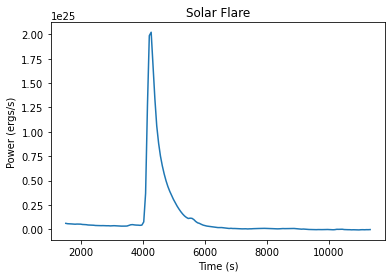

In [ ]:
import matplotlib.pyplot as plt

plt.plot(solar_data.iloc[25:190,0], solar_data.iloc[25:190,1])  # Plot the solar data from index 130 to index 190
plt.title("Solar Flare") ##set title of graph
## label axises of the graph
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (s)")

plt.show()

## Basline correction

As you learned in [Week 7 lecture](https://www.youtube.com/watch?v=XlbRg3e4T9g&feature=youtu.be), one of the primary challenges in determining the total energy of the flare is dealing with the "background." The sun is giving off x-rays even before a flare happens, and we do not want to accidentally include the energy of those x-rays as part of the flare energy. As a result, we need to determine the amount of x-ray power being emitted before the flare (the "baseline") and subtract it from the observed power during the flare to make sure we are only determining the *new* energy created by the flare itself.

Make sure your team has a clear plan for this; refer back to the Week 7 pre-lab lecture, the examples of baseline corrections on the Week 7 Canvas page, or  ask your TA if you need help!

Hint:
You will want to plot the data from the time period leading up to the flare in order to "see" it clearly and to decide on a strategy. For this part, we don't have to care yet about having time in seconds. In fact, it might be easier to leave time in arbitraty "index" units (i.e., data point 1, data point 2, data point 3, and so on). That way, it will be easy to discuss which data points you want to focus on. For example, maybe you think the pre-flare background is points 4 through 50. Then you can easily access these data points like this:

`solar_data.iloc[4:50,1]`


## **Question 1:** In a new markdown cell, explain, in words, how you are doing the baseline correction and the reasoning behind the method you chose. Be as detailed as possible!


We first will plot the whole data file to find where the best spot to get basline correction. We then will analyze the data for the best range. This will be done by graphing multiple different ranges to determine the most accurate representation of the flare's baseline eneregy. Using this range of data, we will take the mean. That mean will be our basline value for the flare.

In [ ]:
# You may need the statistics library for determining means and medians
import statistics as stats

# You will need to plot your flare (as shown in the examples of baseline corrections notebook)
# in order to look at the pre-flare data and show the baseline corrected flare
import matplotlib.pyplot as plt

## Write your code here

baseline = solar_data.iloc[130:190,1].mean() ## get the mean of the solar data from index 130 to 190
print("baseline: ", baseline)
solar_data['longwave (ergs/s)'] = solar_data['longwave (ergs/s)'] - baseline





baseline:  1.460429038423056e+24


## Reporting total energy

Once you have determined the baseline and subtracted this "background," you are ready to determine the total flare energy. Last week, we did this for a practice flare using a function we called `integrate.trapz`. Use this same function to compute the total energy of your new flare, referring back to your work last week if you need to.

Note: As several of our teams learned last week, this function is a little tricky! Make sure to use the appropiate limits for integration by indexing the `x` and `y` variables. You also have to tell it both the y-data AND the x-data to get the integration right (by default, it integrates assuming the x-coordinates are 1, 2, 3, 4, etc.) Be careful with that this week!


## **Question 2:** In a new markdown cell, describe how you are computing the total energy produced by the flare.

Using the integrate.trapz() function, we will integrate over an interval of time defined by our data collected 12/15/2011 (indeces 25-190). This integral will represent the total area under the ergs/s graph over that same period of time. The integral will be equal to the total power produced by the flare in ergs.

In [ ]:
#Import the integrate function; we will use trapezoidal integradion ('integreat.trapz')
import scipy.integrate as integrate
A_woblc = integrate.trapz(solar_data.iloc[25:190,1], solar_data.iloc[25: 190,0]) ## integrates ergs/s over the interval [25,190]
print('Total energy of the flare is: ',A_woblc, ' ergs') ##prints final energy neatly

Total energy of the flare is:  1.1279461464012452e+28  ergs
